In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('four_dataset.csv')
df.head()
print(df.isnull().sum())
print(df.columns.tolist())

engine_size_L        0
car_weight_kg        0
car_age_years        0
fuel_mileage_kmpl    0
co2_emission_gkm     0
dtype: int64
['engine_size_L', 'car_weight_kg', 'car_age_years', 'fuel_mileage_kmpl', 'co2_emission_gkm']


In [6]:
x = df[['engine_size_L', 'car_weight_kg', 'car_age_years']].values.reshape(-1,3)
y = df[['fuel_mileage_kmpl', 'co2_emission_gkm']].values.reshape(-1,2)

xs = MinMaxScaler()
ys = MinMaxScaler()

x = xs.fit_transform(x)
y = ys.fit_transform(y)

jb.dump(xs,"four_x_scaler.pkl")
jb.dump(ys,"four_y_scaler.pkl")

['four_y_scaler.pkl']

In [15]:
def stats(es, cw, ca):
    inp = np.array([[es, cw, ca]], dtype=float)
    xs = jb.load("four_x_scaler.pkl")
    ys = jb.load("four_y_scaler.pkl")
    inp = xs.transform(inp)
    model_path = 'four.keras'
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(3,), activation='relu'),
                                    keras.layers.Dense(16, activation='relu'),
                                    keras.layers.Dense(units=2)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        h = model.fit(x, y, epochs=200)
        model.save('four.keras')
        lv = h.history['loss']
        pred= model.predict(x)
        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure()
        plt.subplot(1,2,1)
        plt.title('fuel mileage')
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.scatter(y[:,0], pred[:,0], label='actual vs predicted', color='Pink')
        plt.plot([y[:,0].min(), y[:,0].max()],[y[:,0].min(), y[:,0].max()], 'k--')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.title('co2 Emission')
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.scatter(y[:,1], pred[:,1],label="actual vs predicted", color='green')
        plt.plot([y[:,1].min(), y[:,1].max()], [y[:,1].min(), y[:,1].max()], 'k--')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()
    return ys.inverse_transform(model.predict(inp))[0]


Epoch 1/200


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3435
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3006
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2624
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2431
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2104
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1918
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1706
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1584
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1430
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1164
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1109
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0936
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0856
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0750
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0622
Epoch 16/200
4/4 ━━━━━━━━━━━━━━

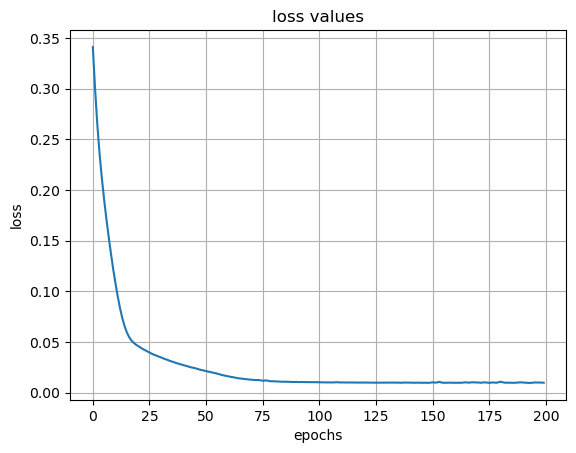

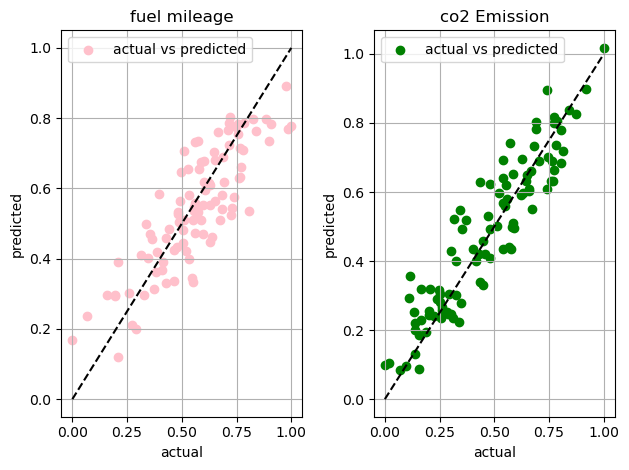

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Mileage: 37.94 km/l, Predicted CO2 Emissions: 109.03 g/km


In [16]:
result = stats(1.5, 1100, 0)  # Petrol car
print(f"Predicted Mileage: {result[0]:.2f} km/l, Predicted CO2 Emissions: {result[1]:.2f} g/km")
